In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFECV

import numpy as np
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance

import pandas as pd

from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy. stats import boxcox 
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler, Normalizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib.colors import ListedColormap
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer,IterativeImputer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import RobustScaler, Normalizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import TargetEncoder
from sklearn.svm import SVR
from category_encoders import LeaveOneOutEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.preprocessing import FunctionTransformer

### Область работы 2 (поиск  модели .... )

In [2]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [3]:
train=pd.read_csv(path_train)

In [4]:
train=train.drop_duplicates()

In [5]:
train

,company,model,year,condition,mileage(km),fuel,volume(cm3),color,transmission,drive_unit,vehicle_size_class,priceUSD
0,renault,laguna,2000,with mileage,230000.0,petrol,1800.0,blue,mechanics,front-wheel drive,D,2300
1,chrysler,pacifica,2005,with mileage,310000.0,petrol,3500.0,black,auto,front-wheel drive,NaN,6300
2,mercedes-benz,c-klass,2010,with mileage,115000.0,petrol,1800.0,gray,auto,rear drive,D,11200
3,hyundai,accent,2017,with mileage,45500.0,petrol,1400.0,gray,auto,front-wheel drive,B,10886
4,renault,kadjar,2016,with mileage,139000.0,diesel,1500.0,red,auto,front-wheel drive,J,15300
...,...,...,...,...,...,...,...,...,...,...,...,...
38000,renault,laguna,1999,with mileage,314000.0,petrol,1600.0,green,mechanics,front-wheel drive,D,1999
38001,opel,insignia,2010,with mileage,230000.0,petrol,1600.0,black,mechanics,front-wheel drive,D,7606
38002,kia,optima,2012,with mileage,115000.0,petrol,2400.0,black,mechanics,front-wheel drive,D,11850
38003,volkswagen,vento,1994,with mileage,300000.0,diesel,1900.0,white,mechanics,front-wheel drive,NaN,1200


In [6]:
train.describe()

,year,mileage(km),volume(cm3),priceUSD
count,37966.000000,3.796600e+04,37966.000000,37966.000000
mean,2003.470210,2.456127e+05,2103.037218,7426.446663
std,8.118807,3.286974e+05,925.478705,8406.013790
min,1910.000000,0.000000e+00,500.000000,48.000000
25%,1998.000000,1.380000e+05,1600.000000,2377.000000
50%,2004.000000,2.300000e+05,1997.000000,5399.000000
75%,2010.000000,3.100000e+05,2300.000000,9847.500000
max,2019.000000,9.999999e+06,20000.000000,235235.000000


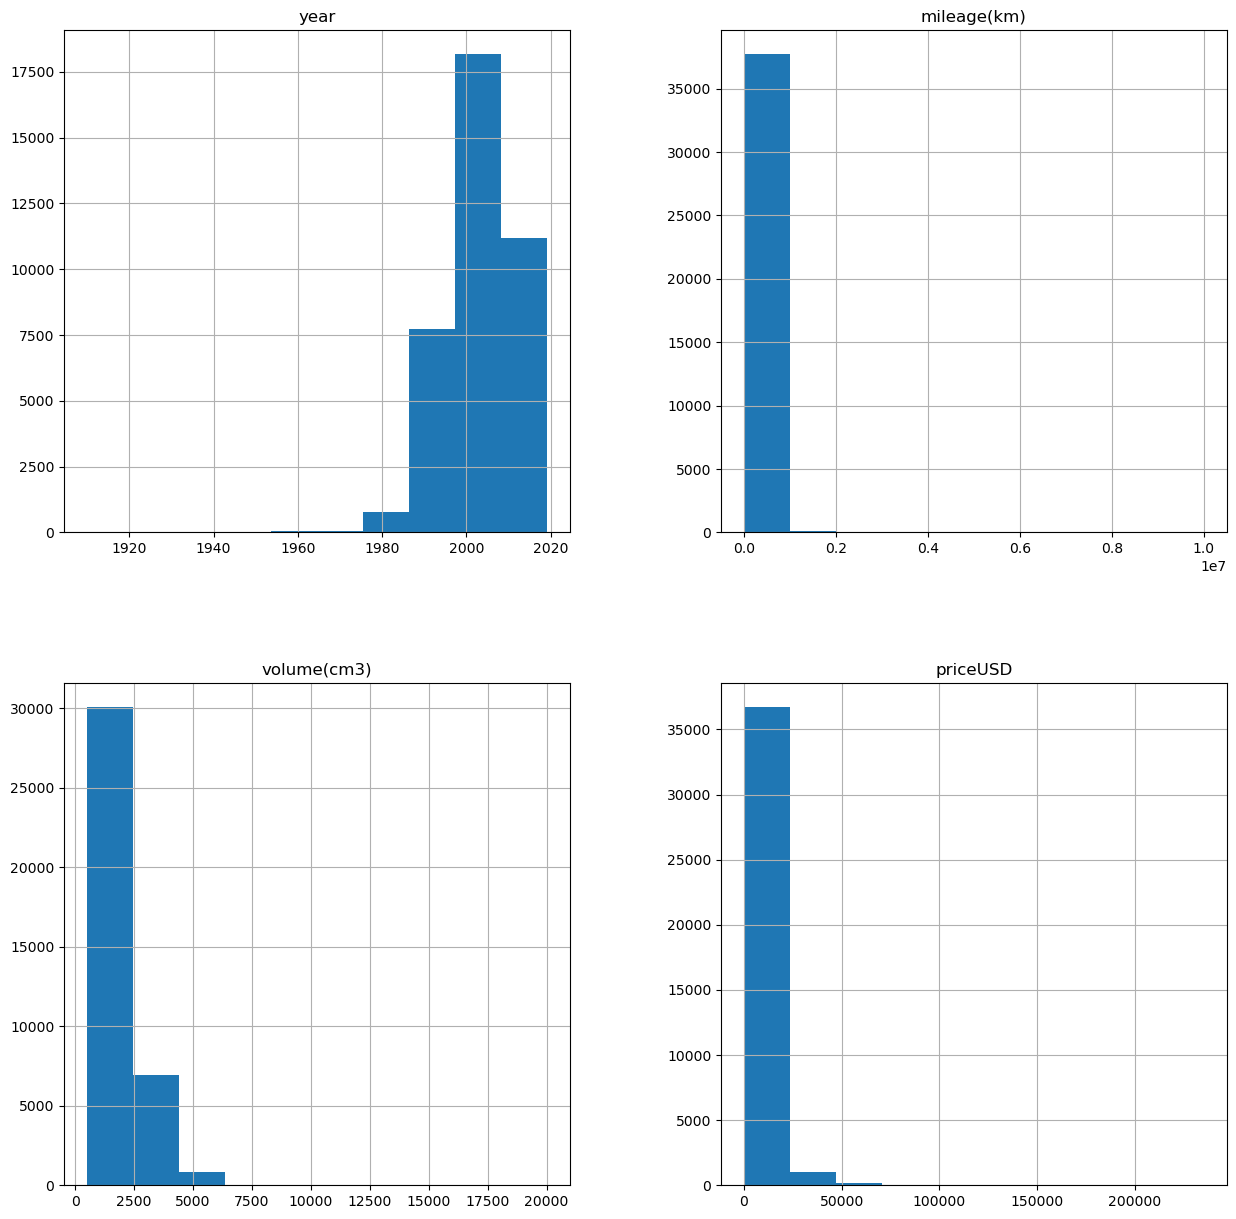

In [7]:
train.hist(figsize=(15, 15));

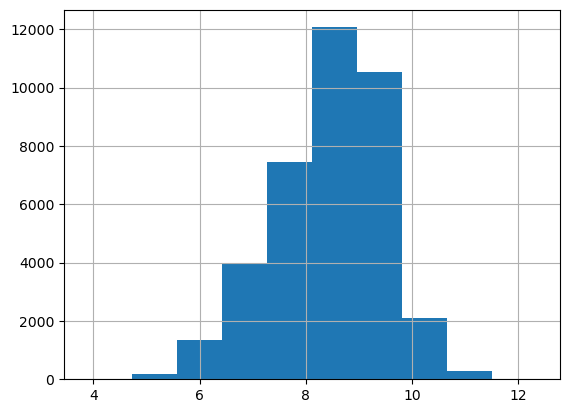

In [8]:
np.log(train.priceUSD).hist();

In [9]:
pt = PowerTransformer(method='box-cox')
train[['year','mileage(km)','volume(cm3)']]= pt.fit_transform(train[['year','mileage(km)','volume(cm3)']]+1)
#X_test[['year','mileage(km)','volume(cm3)']]  = pt.transform(X_test[['year','mileage(km)','volume(cm3)']]+1)


C:\Users\Stepan\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


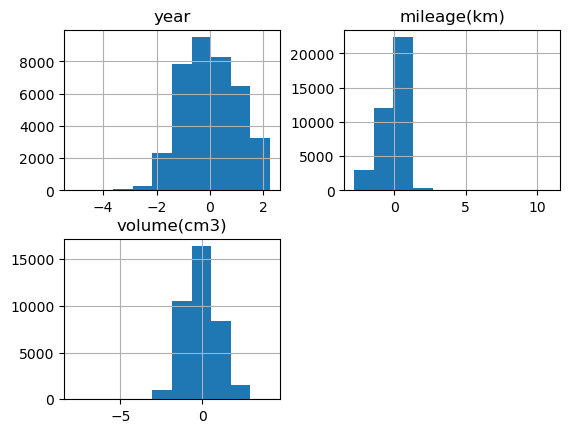

In [10]:
train[['year','mileage(km)','volume(cm3)']].hist();

In [11]:
def outlier_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ~df[column].between(lower_bound, upper_bound)
    return outliers, lower_bound, upper_bound


def anomalies_detection(df, columns=None, function=outlier_iqr):
    if columns:
        columns_check = columns
    else:
        columns_check = df.columns
    anomalies_columns_table = {}
    anomalies = pd.Series(False, index=df.index, name='anomalies')
    for column in columns_check:
        outliers, lower_bound, upper_bound = function(df, column)
        anomalies[outliers[outliers].index] = True
        anomalies_columns_table[column] = [upper_bound, lower_bound, sum(outliers), 100 * np.mean(outliers)]
    anomalies_columns_table = pd.DataFrame(anomalies_columns_table).T
    anomalies_columns_table.columns = ['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_pct']
    return anomalies_columns_table, anomalies

def anomalies_report(anomalies):
    return print("Аномалий: {}\nПроцент аномалий:   {:.2f}%".format(sum(anomalies), 100 * np.mean(anomalies)))

std_data = train[['year','mileage(km)','volume(cm3)']].copy()
anomalies_columns_table, anomalies = anomalies_detection(std_data)    
std_data['is_anomalies'] = anomalies


display(anomalies_columns_table)
anomalies_report(anomalies)
display(std_data)

,upper_bound,lower_bound,anomalies_count,anomalies_pct
year,3.103461,-3.045175,83.0,0.218617
mileage(km),1.958643,-1.800301,2573.0,6.777116
volume(cm3),2.508946,-2.639330,649.0,1.709424


Аномалий: 3228
Процент аномалий:   8.50%


,year,mileage(km),volume(cm3),is_anomalies
0,-0.510249,0.166111,-0.255515,False
1,0.108288,0.549039,1.718582,False
2,0.797723,-0.563106,-0.255515,False
3,1.897281,-1.267252,-1.268681,False
4,1.729840,-0.383603,-0.972985,False
...,...,...,...,...
38000,-0.626090,0.566547,-0.708727,False
38001,0.797723,0.166111,-0.708727,False
38002,1.095094,-0.563106,0.709405,False
38003,-1.168911,0.504673,-0.059388,False


In [12]:
s=std_data[std_data['is_anomalies']==True]
train_cleaned=train.drop(s.index, axis=0)
# X_train=X_train.drop(s.index, axis=0)
# y_train=pd.DataFrame(y_train).drop(s.index,axis=0)

In [13]:
X_train, X_test,y_train, y_test = train_test_split(train_cleaned.drop('priceUSD',axis=1), train_cleaned.priceUSD,train_size=0.7)

In [14]:
cat1=['condition','fuel','transmission','drive_unit']
cat2=['color']

In [15]:
class_map = [{
    'col':'vehicle_size_class',
    'mapping':{'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 
               'J':7, 'M':8, 'S':9}
    }]

In [16]:
def fill_na(x):
    return x.fillna('D')

In [16]:
from category_encoders import TargetEncoder

In [29]:
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder

class_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=class_map)),
    ('scaler', MinMaxScaler())
    ])
cat2_transformer=Pipeline([
    ('en',OrdinalEncoder()),
    ('scaler',MinMaxScaler())
])
cat3=Pipeline([
    ('enc',ce.TargetEncoder()),
    ('scal',MinMaxScaler())
])
imput=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),#FunctionTransformer(fill_na)),
    ('encod',ce.TargetEncoder()),
    ('scaler',MinMaxScaler())
])
CT=ColumnTransformer([
     ('imputer',imput, ['vehicle_size_class']),
    #('bin',KBinsDiscretizer(n_bins=1000, strategy='quantile', encode='onehot-dense'),['year','mileage(km)','volume(cm3)']),
    ('cat2',cat2_transformer,cat2),
    ('cat',OneHotEncoder(),cat1),
    ('cat3',cat3,['company','model']),
    #('cat4',cat2_transformer,['vehicle_size_class']),
  ('scaler',MinMaxScaler(),['year','mileage(km)','volume(cm3)'])
   #('class',class_transformer,['vehicle_size_class'])
])
preprocessor=Pipeline([('data_transformer',CT)])


In [20]:
X_train2=CT.fit_transform(X_train,y_train)

In [23]:
CT.get_feature_names_out()

array(['imputer__0', 'cat2__color', 'cat__condition_for parts',
       'cat__condition_with damage', 'cat__condition_with mileage',
       'cat__fuel_diesel', 'cat__fuel_petrol', 'cat__transmission_auto',
       'cat__transmission_mechanics', 'cat__drive_unit_all-wheel drive',
       'cat__drive_unit_front-wheel drive',
       'cat__drive_unit_part-time four-wheel drive',
       'cat__drive_unit_rear drive', 'cat3__company', 'cat3__model',
       'scaler__year', 'scaler__mileage(km)', 'scaler__volume(cm3)'],
      dtype=object)

In [24]:
pd.DataFrame(columns=CT.get_feature_names_out(),data=X_train2)

,imputer__0,cat2__color,cat__condition_for parts,cat__condition_with damage,cat__condition_with mileage,cat__fuel_diesel,cat__fuel_petrol,cat__transmission_auto,cat__transmission_mechanics,cat__drive_unit_all-wheel drive,cat__drive_unit_front-wheel drive,cat__drive_unit_part-time four-wheel drive,cat__drive_unit_rear drive,cat3__company,cat3__model,scaler__year,scaler__mileage(km),scaler__volume(cm3)
0,0.000000,0.916667,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.159282,0.619841,0.158862,0.359251
1,1.000000,0.583333,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.304521,0.432353,0.753563,0.417613,0.772945
2,0.051462,0.416667,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.158929,0.028951,0.433893,0.617393,0.450881
3,0.160493,0.833333,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.162590,0.091316,0.433893,0.706714,0.526820
4,0.224763,0.083333,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.153915,0.222448,0.645439,0.546035,0.526820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24311,0.160493,0.416667,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.089715,0.218091,0.352379,0.554118,0.526820
24312,0.051462,0.833333,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.150797,0.057756,0.499864,0.596636,0.359251
24313,0.154354,0.416667,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.162590,0.049805,0.392248,0.629277,0.526820
24314,0.224763,0.083333,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.260110,0.246884,0.522828,0.821742,0.670668


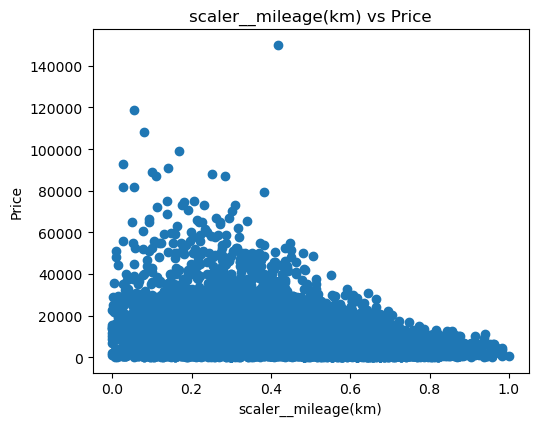

In [28]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(pd.DataFrame(columns=CT.get_feature_names_out(),data=X_train2)[x],y_train)
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('scaler__mileage(km)', 1)

plt.tight_layout()

In [30]:
from sklearn.feature_selection import VarianceThreshold

gb=Pipeline(steps=[
    ("preprocessor", CT), 
     ('variance',VarianceThreshold(threshold=(0.99 * (1 - 0.99)))),
    ("regression", GradientBoostingRegressor(learning_rate=0.1,max_depth=7,n_estimators=500))])

gb.fit(X_train,np.log(y_train))
y_pred=gb.predict(X_test)
mape(y_test,np.exp(y_pred))

0.44817855669642603

In [20]:
mape(y_test,np.exp(y_pred))

0.19848061647374093

In [21]:
np.exp(y_pred)

array([ 3150.03411087,  8235.6342708 , 13290.32781554, ...,
        3083.48296362, 10554.66628199,  7659.03407359])

In [142]:
ridge_pipeline = Pipeline(steps=[
    ("preprocessor", CT), 
    ("regression", Lasso())])
ridge_pipeline.fit(X_train,y_train)
y_pred=ridge_pipeline.predict(X_test)

In [143]:
mape(y_test,y_pred)

0.7551455421738611

In [20]:
np.any(np.exp(y_pred<0))

True

In [21]:
rf=Pipeline(steps=[
    ("preprocessor", CT), 
    ("regression", RandomForestRegressor())])
rf.fit(X_train,np.log(y_train))
y_pred=rf.predict(X_test)
mape(y_test,np.exp(y_pred))

0.20804027962513677

In [55]:
n_estimators = [100,300,500,700]
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
params = [{'regression__min_samples_split': min_samples_split,
               'regression__min_samples_leaf': min_samples_leaf,
               'regression__bootstrap': bootstrap}]
grid = GridSearchCV(rf, params, cv = 5, return_train_score = True, n_jobs = -1,scoring=mape1)
grid.fit(X_train, np.log(y_train))
drop = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params']

rename = {'param_preprocessing': 'preprocessing'}

results_bayes = pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score', 'std_test_score'])

display(results_bayes.drop(columns = drop).rename(columns = rename).T)
grid.best_params_

,2,1,5,4,3,0,6,8,7,17,15,16,14,11,13,12,10,9
param_regression__bootstrap,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False
param_regression__min_samples_leaf,1,1,2,2,2,1,4,4,4,4,4,4,2,1,2,2,1,1
param_regression__min_samples_split,10,5,10,5,2,2,2,10,5,10,2,5,10,10,5,2,5,2
split0_test_score,-0.212208,-0.212502,-0.21304,-0.212373,-0.21159,-0.213542,-0.214891,-0.215561,-0.215155,-0.253814,-0.255567,-0.255593,-0.26213,-0.261864,-0.27191,-0.27443,-0.27585,-0.285629
split1_test_score,-0.208569,-0.209975,-0.209122,-0.209786,-0.210632,-0.211779,-0.210608,-0.211361,-0.211084,-0.252416,-0.254718,-0.254707,-0.264229,-0.266771,-0.278079,-0.281936,-0.281733,-0.290411
split2_test_score,-0.208919,-0.208797,-0.210244,-0.210469,-0.210074,-0.210051,-0.212997,-0.213234,-0.213145,-0.254368,-0.258087,-0.258108,-0.257513,-0.255837,-0.271572,-0.273563,-0.271131,-0.281761
split3_test_score,-0.220647,-0.221587,-0.219981,-0.220749,-0.221226,-0.222663,-0.222831,-0.221891,-0.223143,-0.260939,-0.263349,-0.263335,-0.264746,-0.267882,-0.278472,-0.280831,-0.283209,-0.289104
split4_test_score,-0.216111,-0.215581,-0.216606,-0.216286,-0.216854,-0.217291,-0.219857,-0.219761,-0.219956,-0.261114,-0.264083,-0.264108,-0.268136,-0.272338,-0.284959,-0.285346,-0.295116,-0.302135
mean_test_score,-0.213291,-0.213688,-0.213799,-0.213933,-0.214075,-0.215065,-0.216237,-0.216361,-0.216497,-0.25653,-0.259161,-0.25917,-0.263351,-0.264938,-0.276999,-0.279221,-0.281408,-0.289808
std_test_score,0.004575,0.004585,0.004029,0.00409,0.00431,0.004493,0.004485,0.003938,0.004438,0.003726,0.003888,0.003888,0.003498,0.00564,0.004941,0.004526,0.008097,0.006856


{'regression__bootstrap': True,
 'regression__min_samples_leaf': 1,
 'regression__min_samples_split': 10}

In [146]:
rf=Pipeline(steps=[
    ("preprocessor", CT), 
    ("regression", RandomForestRegressor(min_samples_leaf=1,min_samples_split=10,bootstrap=True))])
rf.fit(X_train,np.log(y_train))
y_pred=rf.predict(X_test)
mape(y_test,np.exp(y_pred))

0.20804994580534403

In [23]:
def mape1(y_true, y_pred):
    y_true, y_pred = np.exp(y_true), np.exp(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

mape1 = make_scorer(mape1, greater_is_better=False)

In [260]:
cv_scores = cross_val_score(rf, X_test, np.log(y_test), cv=10,scoring=mape1 )
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV Precision = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -0.2541
	-0.2451
	-0.2197
	-0.2378
	-0.2254
	-0.2165
	-0.2375
	-0.2260
	-0.2205
	-0.2314
Mean CV Precision = 0.2314


In [24]:
gb=Pipeline(steps=[
    ("preprocessor", CT), 
    ("regression", GradientBoostingRegressor())])
gb.fit(X_train,np.log(y_train))
y_pred=gb.predict(X_test)
mape(y_test,np.exp(y_pred))

0.24158895378288056

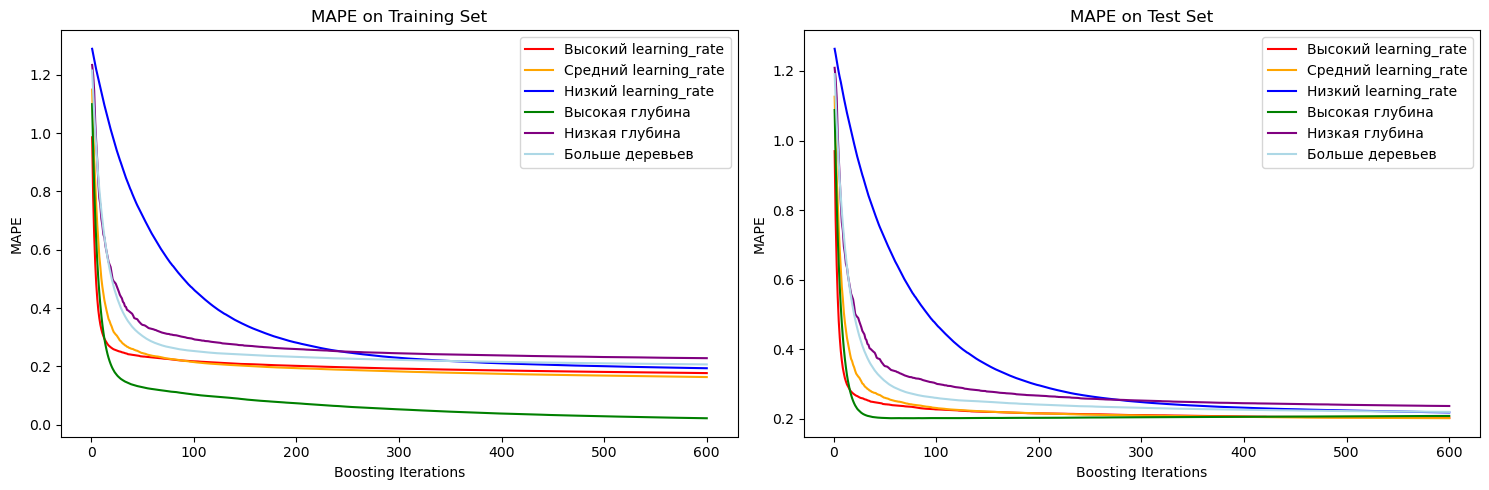

In [31]:
original_params = {
    "n_estimators": 600,
    "random_state": 42,
    'criterion': 'friedman_mse'
}

# Изменение настроек параметров для регрессии
parameter_settings = {
    "high_learning_rate": {
        "label": "Высокий learning_rate",
        "color": "red",
        "params": {"learning_rate": 0.2, "subsample": 1.0, "max_depth": 3,  "max_features": None}
    },
    "moderate_learning_rate": {
        "label": "Средний learning_rate",
        "color": "orange",
        "params": {"learning_rate": 0.1, "subsample": 1.0, "max_depth": 5, "max_features": 'sqrt'}
    },
    "low_learning_rate": {
        "label": "Низкий learning_rate",
        "color": "blue",
        "params": {"learning_rate": 0.01, "subsample": 0.8, "max_depth": 7, "max_features": 'log2'}
    },
    "high_depth": {
        "label": "Высокая глубина",
        "color": "green",
        "params": {"learning_rate": 0.1, "subsample": 0.8, "max_depth": 10, "max_features": None}
    },
    "low_depth": {
        "label": "Низкая глубина",
        "color": "purple",
        "params": {"learning_rate": 0.1, "subsample": 1.0, "max_depth": 2, "max_features": 'sqrt'}
    },
    "more_estimators": {
        "label": "Больше деревьев",
        "color": "lightblue",
        "params": {"learning_rate": 0.05, "subsample": 0.8, "max_depth": 3, "max_features": None}
    }
}


fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for setting_name, setting_info in parameter_settings.items():
    params = dict(original_params)
    params.update(setting_info['params'])

    reg = Pipeline(steps=[
        ("preprocessor", CT), 
        ("regression", GradientBoostingRegressor(**params))
    ])

    reg.fit(X_train, np.log(y_train))
    final_regressor = reg.named_steps["regression"]
    
    # Расчет MAPE на обучающем наборе
    train_mape = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(final_regressor.staged_predict(reg.named_steps["preprocessor"].transform(X_train))):
        train_mape[i] =mape(y_train, np.exp(y_pred))
        
    ax1.plot(
        (np.arange(train_mape.shape[0]) + 1),
        train_mape,
        "-",
        color=setting_info['color'],
        label=setting_info['label'],
    )

    # Расчет MAPE на тестовом наборе
    test_mape = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(final_regressor.staged_predict(reg.named_steps["preprocessor"].transform(X_test))):
        test_mape[i] = mape(y_test, np.exp(y_pred))
        
    ax2.plot(
        (np.arange(test_mape.shape[0]) + 1),
        test_mape,
        "-",
        color=setting_info['color'],
        label=setting_info['label'],
    )

ax1.set_title("MAPE on Training Set")
ax1.set_xlabel("Boosting Iterations")
ax1.set_ylabel("MAPE")
ax1.legend(loc='upper right')

ax2.set_title("MAPE on Test Set")
ax2.set_xlabel("Boosting Iterations")
ax2.set_ylabel("MAPE")
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [48]:
gb=Pipeline(steps=[
    ("preprocessor", CT), 
    ("regression", GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=1000,subsample=1,max_features='sqrt'))])
gb.fit(X_train,np.log(y_train))
y_pred=gb.predict(X_test)
mape(y_test,np.exp(y_pred))

0.19924956207736513

In [49]:
np.any(y_pred<0)

False

In [62]:
svr=Pipeline(steps=[
    ("preprocessor", CT), 
    ("regression", SVR())])
svr.fit(X_train,np.log(y_train))
y_pred=svr.predict(X_test)
mape(y_test,np.exp(y_pred))

0.2592091499500535

In [63]:
C=np.array([0.01,0.1,1,10])
gamma=[0.1,1,5,10]

param_grid =[
    { 'regression__C': C,
     'regression__gamma': gamma
     }
]

grid = GridSearchCV(svr, param_grid, cv=5, return_train_score=True,n_jobs=-1,scoring=mape1)

grid.fit(X_train,np.log(y_train))
grid.best_params_

{'regression__C': 10.0, 'regression__gamma': 1}

In [50]:
svr=Pipeline(steps=[
    ("preprocessor", CT), 
    ("regression", SVR(C=10,gamma=1))])
svr.fit(X_train,np.log(y_train))
y_pred=svr.predict(X_test)
mape(y_test,np.exp(y_pred))

0.2503282775313942

In [67]:
alpha=[0.001,0.01,0.1]+list(range(1,30))
param_grid =[
    { 'regression__alpha': alpha
     }
]
grid = GridSearchCV(ridge_pipeline, param_grid, cv=5, return_train_score=True,n_jobs=-1,scoring=mape1)
grid.fit(X_train,np.log(y_train))
drop = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params']

rename = {'param_preprocessing': 'preprocessing'}

results_bayes = pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score', 'std_test_score'])

display(results_bayes.drop(columns = drop).rename(columns = rename).T)
grid.best_params_

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
param_regression__alpha,0.001,0.01,0.1,1,2,3,4,5,6,7,...,20,21,22,23,24,25,26,27,28,29
split0_test_score,-0.289302,-0.289304,-0.289318,-0.289467,-0.289638,-0.289814,-0.289999,-0.290186,-0.290376,-0.290566,...,-0.293308,-0.293539,-0.29377,-0.294005,-0.294241,-0.29448,-0.29472,-0.294961,-0.295206,-0.295454
split1_test_score,-0.283214,-0.283215,-0.283224,-0.283314,-0.28342,-0.283532,-0.283648,-0.283768,-0.283892,-0.28402,...,-0.286022,-0.286198,-0.286378,-0.286562,-0.28675,-0.286942,-0.287137,-0.287333,-0.287532,-0.287734
split2_test_score,-0.285246,-0.285248,-0.28526,-0.28539,-0.28554,-0.285693,-0.28585,-0.28601,-0.286177,-0.286349,...,-0.288881,-0.289093,-0.289305,-0.289517,-0.28973,-0.289946,-0.290166,-0.29039,-0.290617,-0.290847
split3_test_score,-0.303289,-0.303289,-0.303294,-0.303345,-0.303408,-0.303477,-0.303555,-0.303638,-0.303722,-0.303811,...,-0.305347,-0.30549,-0.305635,-0.305782,-0.305932,-0.306083,-0.306238,-0.306395,-0.306553,-0.306713
split4_test_score,-0.291902,-0.291904,-0.291919,-0.292072,-0.292248,-0.292429,-0.292615,-0.292806,-0.292998,-0.293193,...,-0.296054,-0.296286,-0.296526,-0.296767,-0.297009,-0.297257,-0.297509,-0.297763,-0.298016,-0.29827
mean_test_score,-0.290591,-0.290592,-0.290603,-0.290718,-0.290851,-0.290989,-0.291133,-0.291282,-0.291433,-0.291588,...,-0.293923,-0.294121,-0.294323,-0.294527,-0.294732,-0.294942,-0.295154,-0.295368,-0.295585,-0.295804
std_test_score,0.007037,0.007037,0.007035,0.007015,0.006993,0.006972,0.006953,0.006934,0.006915,0.006895,...,0.006682,0.006668,0.006655,0.006641,0.006627,0.006613,0.006599,0.006585,0.006571,0.006556
rank_test_score,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
split0_train_score,-0.289175,-0.289176,-0.289186,-0.289292,-0.289415,-0.289542,-0.289673,-0.28981,-0.289951,-0.290095,...,-0.292271,-0.292458,-0.292647,-0.292838,-0.293031,-0.293226,-0.293423,-0.293622,-0.293823,-0.294026


{'regression__alpha': 0.001}

In [68]:
ridge_pipeline = Pipeline(steps=[
    ("preprocessor", CT), 
    ("regression", Ridge(alpha=0.001))])
ridge_pipeline.fit(X_train,np.log(y_train))
y_pred=ridge_pipeline.predict(X_test)
mape(y_test,np.exp(y_pred))

0.2868247683257102

In [147]:
v_reg1 = SVR(C=10,gamma=1)
v_reg2 = GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=1000,subsample=1,max_features='sqrt')
v_reg3 =RandomForestRegressor(min_samples_leaf=1,min_samples_split=10,bootstrap=True)

ve_reg = VotingRegressor(
    estimators=[('svr', v_reg1), ('gb', v_reg2), ('rf', v_reg3)])
pipe=Pipeline([
    ('preprocessing', CT), 
    ('variance',VarianceThreshold(threshold=(0.99 * (1 - 0.99)))),
                 ('regression', ve_reg)])
pipe.fit(X_train,np.log(y_train))
y_pred=pipe.predict(X_test)
mape(y_test,np.exp(y_pred))

0.2035431175183636

In [148]:
np.any(y_pred<0)

False

In [71]:
cv_scores = cross_val_score(pipe, X_test, np.log(y_test), cv=5,scoring=mape1 )
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV Precision = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -0.2198
	-0.2302
	-0.2248
	-0.2244
	-0.2126
Mean CV Precision = 0.2224


In [74]:
se_reg = StackingRegressor(
    estimators = [('svr', v_reg1), ('gb', v_reg2), ('rf', v_reg3)],
    final_estimator = RandomForestRegressor(min_samples_leaf=2,min_samples_split=2,bootstrap=True)
)
pipe2=Pipeline([
    ('preprocessing', CT), 
                 ('regression', se_reg)])
pipe2.fit(X_train,np.log(y_train))
y_pred=pipe2.predict(X_test)
mape(y_test,np.exp(y_pred))

0.202939041419248

In [63]:
gb=Pipeline(steps=[
    ("preprocessor", CT), 
    ('k',SelectKBest(f_regression, k=10))])
gb.fit(X_train, y_train)
gb.named_steps['k'].get_feature_names_out()

array(['x0', 'x7', 'x8', 'x9', 'x10', 'x13', 'x14', 'x15', 'x16', 'x17'],
      dtype=object)

In [82]:
pd.DataFrame(CT.transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.375,0.166667,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.341726,0.405688,0.698330,0.482780,0.246040
1,0.375,0.166667,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.141479,0.260033,0.841026,0.215006,0.359251
2,0.500,0.083333,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.149708,0.045853,0.499864,0.578979,0.590956
3,0.375,0.833333,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.468549,0.221133,0.477393,0.604880,0.590956
4,0.125,0.833333,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.035887,0.046543,0.871463,0.144588,0.101826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24311,0.125,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.153176,0.190092,0.522828,0.516774,0.178604
24312,0.500,0.833333,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.428416,0.263326,0.295746,0.515341,0.526820
24313,0.000,0.916667,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.434618,0.274603,0.782089,0.261939,0.359251
24314,0.375,0.416667,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.841135,0.371137,0.499864,0.512462,0.670668


In [81]:
CT.fit(X_train,y_train)
gb=GradientBoostingRegressor(learning_rate=0.1,max_depth=7,n_estimators=500)
gb.fit(pd.DataFrame(CT.transform(X_train))[[0,7,8,9,10,13,14,15,16,17]],np.log(y_train))
y_pred=gb.predict(pd.DataFrame(CT.transform(X_test))[[0,7,8,9,10,13,14,15,16,17]])
mape(y_test,np.exp(y_pred))

0.20873422411174308

In [83]:
import itertools

best_mape = float('inf')  # Initialize with a high value
best_subset = None

# Generate all possible subsets of indices from 0 to 17
all_subsets = []
for r in range(1, 18):  # Subsets of size 1 to 17
    all_subsets.extend(itertools.combinations(range(18), r))

# Iterate through each subset
for subset in all_subsets:
    subset = list(subset)
    
    # Fit the model using the current subset of features
    gb.fit(pd.DataFrame(CT.transform(X_train))[subset], np.log(y_train))
    
    # Make predictions on the test set
    y_pred = gb.predict(pd.DataFrame(CT.transform(X_test))[subset])
    
    # Calculate MAPE
    current_mape = mape(y_test, np.exp(y_pred))
    
    # Check if the current subset gives a better MAPE
    if current_mape < best_mape:
        best_mape = current_mape
        best_subset = subset

# Output the best subset and MAPE
print("Best Subset:", best_subset)
print("Best MAPE:", best_mape)

KeyboardInterrupt: 

In [85]:
best_mape

0.20658588525944455

In [96]:
pd.DataFrame(np.hstack([train_cleaned.drop('priceUSD',axis=1), pd.DataFrame(noise)]),columns=list(train_cleaned.drop('priceUSD',axis=1).columns)+['A','B','C','D','E','F','G','H','I','J','K','L','O','P','Q','R','S','T','U','W','V','Z','N','M','X'])

,company,model,year,condition,mileage(km),fuel,volume(cm3),color,transmission,drive_unit,...,R,S,T,U,W,V,Z,N,M,X
0,renault,laguna,-0.510249,with mileage,0.166111,petrol,-0.255515,blue,mechanics,front-wheel drive,...,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748,-0.544383
1,chrysler,pacifica,0.108288,with mileage,0.549039,petrol,1.718582,black,auto,front-wheel drive,...,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.76304
2,mercedes-benz,c-klass,0.797723,with mileage,-0.563106,petrol,-0.255515,gray,auto,rear drive,...,1.35624,-0.07201,1.003533,0.361636,-0.64512,0.361396,1.538037,-0.035826,1.564644,-2.619745
3,hyundai,accent,1.897281,with mileage,-1.267252,petrol,-1.268681,gray,auto,front-wheel drive,...,0.097078,0.968645,-0.702053,-0.327662,-0.392108,-1.463515,0.29612,0.261055,0.005113,-0.234587
4,renault,kadjar,1.72984,with mileage,-0.383603,diesel,-0.972985,red,auto,front-wheel drive,...,0.301547,-0.034712,-1.168678,1.142823,0.751933,0.791032,-0.909387,1.402794,-1.401851,0.586857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34733,renault,laguna,-0.62609,with mileage,0.566547,petrol,-0.708727,green,mechanics,front-wheel drive,...,-0.608156,-0.321042,-1.280404,0.367529,-0.874063,-0.646807,-0.50758,0.494364,-1.709353,-0.764223
34734,opel,insignia,0.797723,with mileage,0.166111,petrol,-0.708727,black,mechanics,front-wheel drive,...,2.515767,-0.126574,-0.274231,-0.154765,-0.49349,0.387748,0.114535,0.728796,2.461225,1.68034
34735,kia,optima,1.095094,with mileage,-0.563106,petrol,0.709405,black,mechanics,front-wheel drive,...,0.94602,-0.636426,1.395998,0.290044,0.783423,1.873198,-0.383303,0.134317,0.265207,-1.287495
34736,volkswagen,vento,-1.168911,with mileage,0.504673,diesel,-0.059388,white,mechanics,front-wheel drive,...,1.09155,-0.646247,0.723971,-0.648179,-0.317076,0.305009,-0.017717,0.16882,-0.198365,-1.277603


In [86]:
from sklearn.feature_selection import SelectPercentile


# задаем определенное стартовое значение для воспроизводимости результата
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(train_cleaned), 14))
# добавляем к данным шумовые признаки
# первые 30 признаков являются исходными, остальные 50 являются шумовыми
X_w_noise = pd.DataFrame(np.hstack([train_cleaned.drop('priceUSD',axis=1), pd.DataFrame(noise)]),columns=list(train_cleaned.drop('priceUSD',axis=1).columns)+['A','B','C','D','E','F','G','H','I','J','K','L','O','P'])
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_w_noise, train_cleaned.priceUSD.reset_index(drop=True), test_size=.3)
# используем f_classif (по умолчанию)
# и SelectPercentile, чтобы выбрать 50% признаков

select_pct = SelectPercentile(percentile=50)
pipee=Pipeline([
    ('preproc',CT),
    ('perc',select_pct),
    ("regression", GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=1000,subsample=1,max_features='sqrt'))
])
pipee.fit(X_train3, np.log(y_train3))
# преобразовываем обучающий набор
# X_train_selected = pipee.transform(X_train)
# X_test_selected=pipee.transform(X_test)

# Получаем имена столбцов из ColumnTransformer

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   FunctionTransformer(func=<function fill_na at 0x0000018A7631B1F0>)),
                                                                  ('encod',
                                                                   OrdinalEncoder()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['vehicle_size_class']),
                                                 ('cat2',
                                                  Pipeline(steps=[('en',
                                                                   OrdinalEncoder()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['color']),
                                                 ('cat', OneHotEncoder(),
                                                  ['condition', 'fuel',
                                                   'transmission',
                                                   'drive_unit']),
                                                 ('cat3',
                                                  Pipeline(steps=[('enc',
                                                                   TargetEncoder()),
                                                                  ('scal',
                                                                   MinMaxScaler())]),
                                                  ['company', 'model']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['year', 'mileage(km)',
                                                   'volume(cm3)'])])),
                ('perc', SelectPercentile(percentile=50)),
                ('regression',
                 GradientBoostingRegressor(max_depth=5, max_features='sqrt',
                                           n_estimators=1000, subsample=1))])

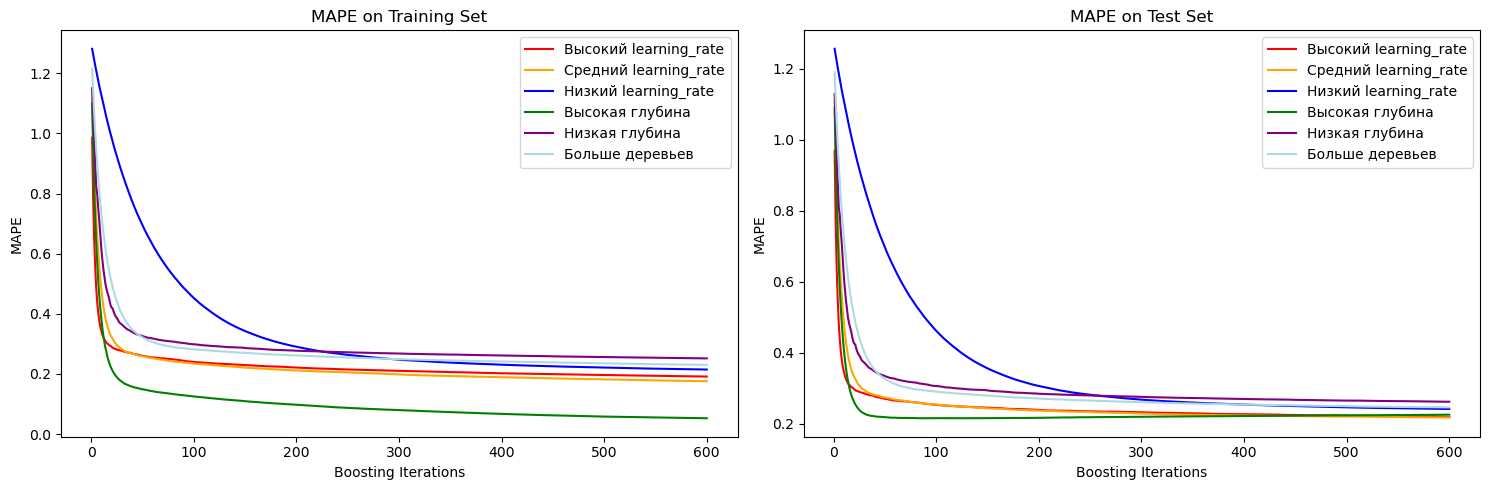

In [96]:
original_params = {
    "n_estimators": 600,
    "random_state": 42,
    'criterion': 'friedman_mse'
}

# Изменение настроек параметров для регрессии
parameter_settings = {
    "high_learning_rate": {
        "label": "Высокий learning_rate",
        "color": "red",
        "params": {"learning_rate": 0.2, "subsample": 1.0, "max_depth": 3,  "max_features": None}
    },
    "moderate_learning_rate": {
        "label": "Средний learning_rate",
        "color": "orange",
        "params": {"learning_rate": 0.1, "subsample": 1.0, "max_depth": 5, "max_features": 'sqrt'}
    },
    "low_learning_rate": {
        "label": "Низкий learning_rate",
        "color": "blue",
        "params": {"learning_rate": 0.01, "subsample": 0.8, "max_depth": 7, "max_features": 'log2'}
    },
    "high_depth": {
        "label": "Высокая глубина",
        "color": "green",
        "params": {"learning_rate": 0.1, "subsample": 0.8, "max_depth": 10, "max_features": None}
    },
    "low_depth": {
        "label": "Низкая глубина",
        "color": "purple",
        "params": {"learning_rate": 0.1, "subsample": 1.0, "max_depth": 2, "max_features": 'sqrt'}
    },
    "more_estimators": {
        "label": "Больше деревьев",
        "color": "lightblue",
        "params": {"learning_rate": 0.05, "subsample": 0.8, "max_depth": 3, "max_features": None}
    }
}


fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for setting_name, setting_info in parameter_settings.items():
    params = dict(original_params)
    params.update(setting_info['params'])

    reg=Pipeline([
    ('preproc',CT),
    ('perc',select_pct),
    ("regression", GradientBoostingRegressor(**params))
    ])

    reg.fit(X_train, np.log(y_train))
    final_regressor = reg.named_steps["regression"]
    
    # Расчет MAPE на обучающем наборе
    train_mape = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(final_regressor.staged_predict(reg.named_steps['perc'].transform(reg.named_steps["preproc"].transform(X_train)))):
    
        train_mape[i] =mape(y_train, np.exp(y_pred))
        
    ax1.plot(
        (np.arange(train_mape.shape[0]) + 1),
        train_mape,
        "-",
        color=setting_info['color'],
        label=setting_info['label'],
    )

    # Расчет MAPE на тестовом наборе
    test_mape = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(final_regressor.staged_predict(reg.named_steps['perc'].transform(reg.named_steps["preproc"].transform(X_test)))):
        test_mape[i] = mape(y_test, np.exp(y_pred))
        
    ax2.plot(
        (np.arange(test_mape.shape[0]) + 1),
        test_mape,
        "-",
        color=setting_info['color'],
        label=setting_info['label'],
    )

ax1.set_title("MAPE on Training Set")
ax1.set_xlabel("Boosting Iterations")
ax1.set_ylabel("MAPE")
ax1.legend(loc='upper right')

ax2.set_title("MAPE on Test Set")
ax2.set_xlabel("Boosting Iterations")
ax2.set_ylabel("MAPE")
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [89]:
y_pred=pipee.predict(X_test3)
mape(y_test3,np.exp(y_pred))

0.21856162807519103

In [97]:
reg=Pipeline([
    ('preproc',CT),
    ('perc',select_pct),
    ("regression", ve_reg)
    ])
reg.fit(X_train,np.log(y_train))
y_pred=reg.predict(X_test)
mape(y_test,np.exp(y_pred))

0.2253089498087514

In [131]:
from sklearn.feature_selection import VarianceThreshold

gb=Pipeline(steps=[
    ("preprocessor", CT), 
     ('variance',VarianceThreshold(threshold=(0.99 * (1 - 0.99)))),
    ("regression", GradientBoostingRegressor(learning_rate=0.1,max_depth=7,n_estimators=500))])

gb.fit(X_train,np.log(y_train))
y_pred=gb.predict(X_test)
mape(y_test,np.exp(y_pred))

0.19754373165830377

In [100]:
gb=Pipeline(steps=[
    ("preprocessor", CT), 
    ('k',SelectKBest(f_regression, k=12))])
gb.fit(X_train, y_train)
gb.named_steps['k'].get_feature_names_out()

array(['x0', 'x5', 'x7', 'x8', 'x9', 'x10', 'x11', 'x13', 'x14', 'x15',
       'x16', 'x17'], dtype=object)

In [109]:
CT.fit(X_train,y_train)
X_train_trans=CT.transform(X_train)
X_test_trans=CT.transform(X_test)
gb=Pipeline(steps=[
    ('preprocessor',CT),
     #('variance',VarianceThreshold(threshold=(0.99 * (1 - 0.99)))),
    ("regression", GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=1000,subsample=1,max_features='sqrt'))])

gb.fit(X_train,np.log(y_train))
y_pred=gb.predict(X_test)
mape(y_test,np.exp(y_pred))

0.19828481153083058

In [126]:
(y_test-np.exp(y_pred))

14744    -223.030516
7344     -277.810982
17645    -700.704520
12525    -379.421249
6686       21.433474
            ...     
36670   -1372.811541
25635    1011.369100
4926     -930.015066
20540    -457.202633
26709     673.848234
Name: priceUSD, Length: 10422, dtype: float64

Отрицательные цены -  0
Max Error: -103,480
MAPE Error: 19.83


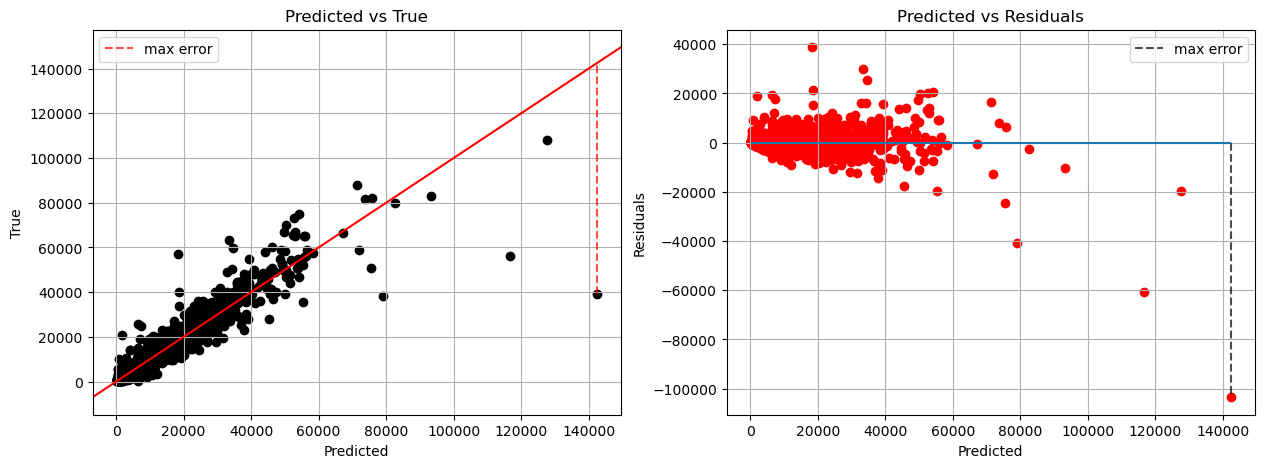

In [127]:
print('Отрицательные цены - ', sum(y_pred<0))
y_test2=y_test.reset_index(drop=True)

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predicted)
    print("Max Error:", "{:,.0f}".format(max_error))
    print("MAPE Error:", "{:,.2f}".format(mape*100))

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_test2, np.exp(y_pred))

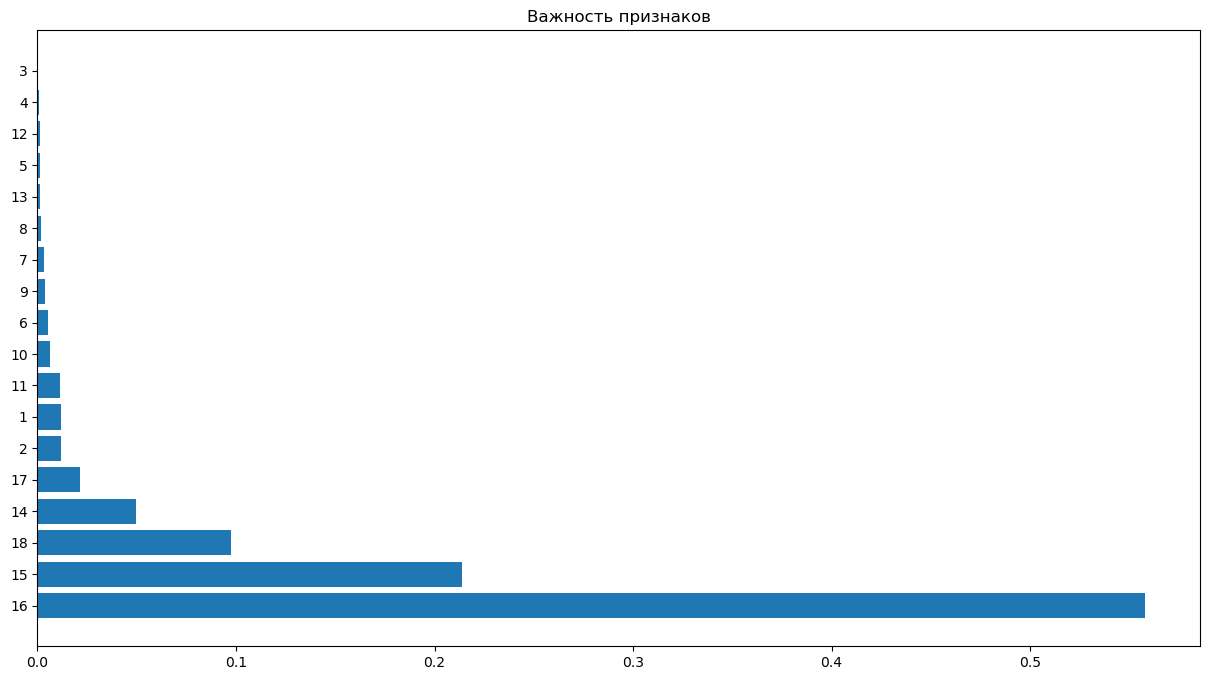

In [141]:
gb=Pipeline(steps=[
    ("preprocessor", CT), 
    ("regression", GradientBoostingRegressor(learning_rate=0.1,max_depth=7,n_estimators=500))])
gb.fit(X_train,y_train)


plt.figure(figsize=(15,8))
feature_names = np.array(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18'])
#importance = rfc.feature_importances_

importance = np.sort(gb.named_steps["regression"].feature_importances_)
importance_name = np.argsort(gb.named_steps["regression"].feature_importances_)

plt.barh(width=importance, y = feature_names[importance_name] )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

In [145]:
gb.named_steps['preprocessor'].fit(X_train,y_train)
X_train_transformed=gb.named_steps['preprocessor'].transform(X_train)
X_test_transformed=gb.named_steps['preprocessor'].transform(X_test)

In [146]:
X_train_transformed=pd.DataFrame(X_train_transformed,columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18'])
X_test_transformed=pd.DataFrame(X_test_transformed,columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18'])

In [158]:
gb.named_steps['regression'].fit(X_train_transformed.drop('3',axis=1),np.log(y_train))
y_pred=gb.named_steps['regression'].predict(X_test_transformed.drop('3',axis=1))
mape(y_test,np.exp(y_pred))

0.19844541843713726

,mean,std
17,0.021120,2.428613e-17
14,0.043722,3.469447e-17
18,0.105456,4.163336e-17
15,0.221505,1.942890e-16
16,0.567156,9.992007e-16


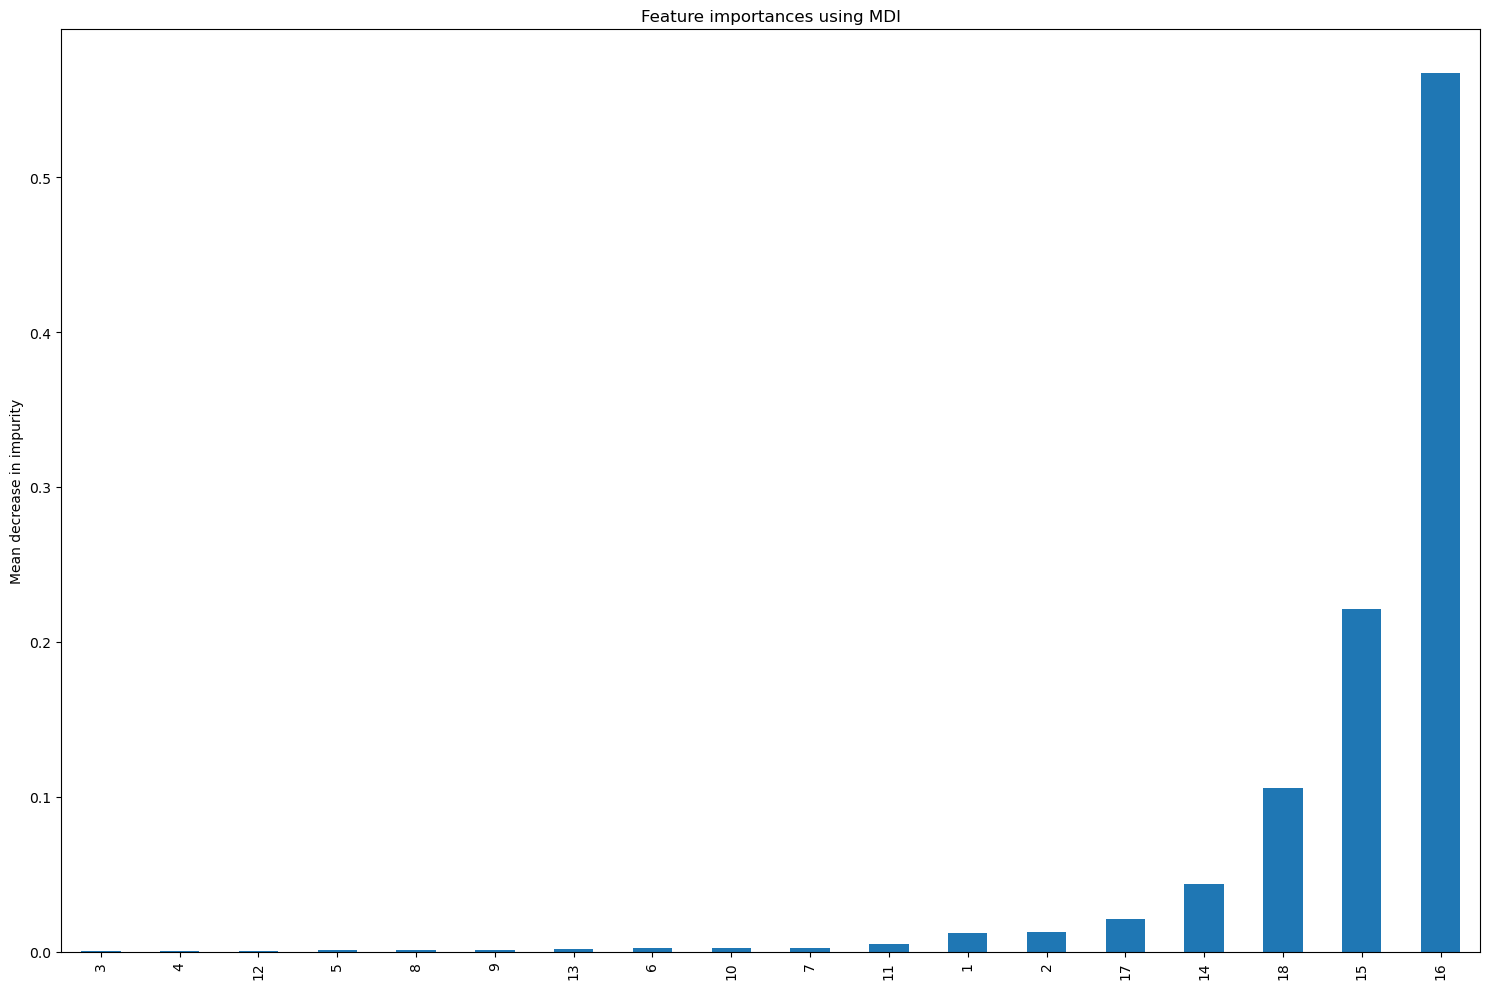

In [119]:
feature_names = np.array(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18'])
forest_importances = pd.DataFrame(rf.named_steps["regression"].feature_importances_, index=feature_names, columns =['mean'])
forest_importances['std'] = np.std([rf.named_steps["regression"].feature_importances_ for tree in rf.named_steps["regression"].estimators_], axis=0)

sort_forest = forest_importances.sort_values(by='mean')


fig, ax = plt.subplots(figsize=(15,10))
col = sort_forest['mean']
yerr = sort_forest['std']
col.plot.bar(yerr=yerr, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

display(sort_forest.tail(5))

In [108]:
CT.fit(X_train, np.log(y_train))

X_train_transformed = CT.transform(X_train)
X_test_transformed=CT.transform(X_test)

In [114]:
['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18']

(24316, 18)

The least populated class in y has only 1 members, which is less than n_splits=3.
overflow encountered in exp
invalid value encountered in subtract
invalid value encountered in true_divide
overflow encountered in exp
invalid value encountered in subtract
invalid value encountered in true_divide
overflow encountered in exp
invalid value encountered in subtract
invalid value encountered in true_divide
overflow encountered in exp
invalid value encountered in subtract
invalid value encountered in true_divide
overflow encountered in exp
invalid value encountered in subtract
invalid value encountered in true_divide
overflow encountered in exp
invalid value encountered in subtract
invalid value encountered in true_divide
overflow encountered in exp
invalid value encountered in subtract
invalid value encountered in true_divide
overflow encountered in exp
invalid value encountered in subtract
invalid value encountered in true_divide
overflow encountered in exp
invalid value encountered in subtr

Оптимально : 1


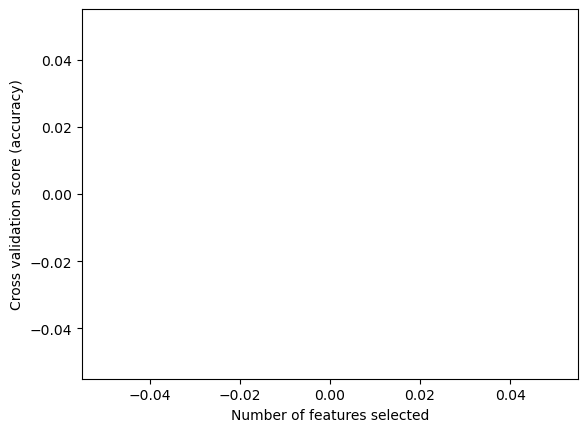

In [153]:
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator= GradientBoostingRegressor(learning_rate=0.1,max_depth=7,n_estimators=500),
    step=1,
    cv=StratifiedKFold(3),
    scoring=mape1,
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train_transformed, y_train)

print("Оптимально : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
filtered = pd.DataFrame(rfecv.cv_results_).filter(regex='split') #[s for s in rfecv.cv_results_.keys() if 'split' in s]
plt.plot(
    range(min_features_to_select, len(filtered) + min_features_to_select),
    filtered
)
plt.show()

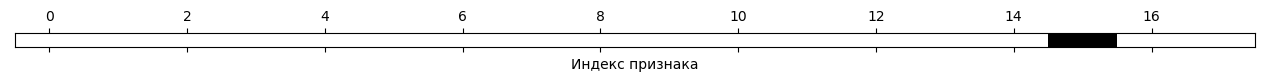

In [154]:
mask = rfecv.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
plt.yticks([])
plt.xlabel("Индекс признака");

In [121]:
import shap
# gb=Pipeline(steps=[
#     ("preprocessor", CT), 
#     ("regression", GradientBoostingRegressor(learning_rate=0.1,max_depth=7,n_estimators=500))])
explainer = shap.GradientExplainer(gb, X_train_transformed)
shap_values = explainer.shap_values(X_train_transformed)

feature_names = np.array(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18'])

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

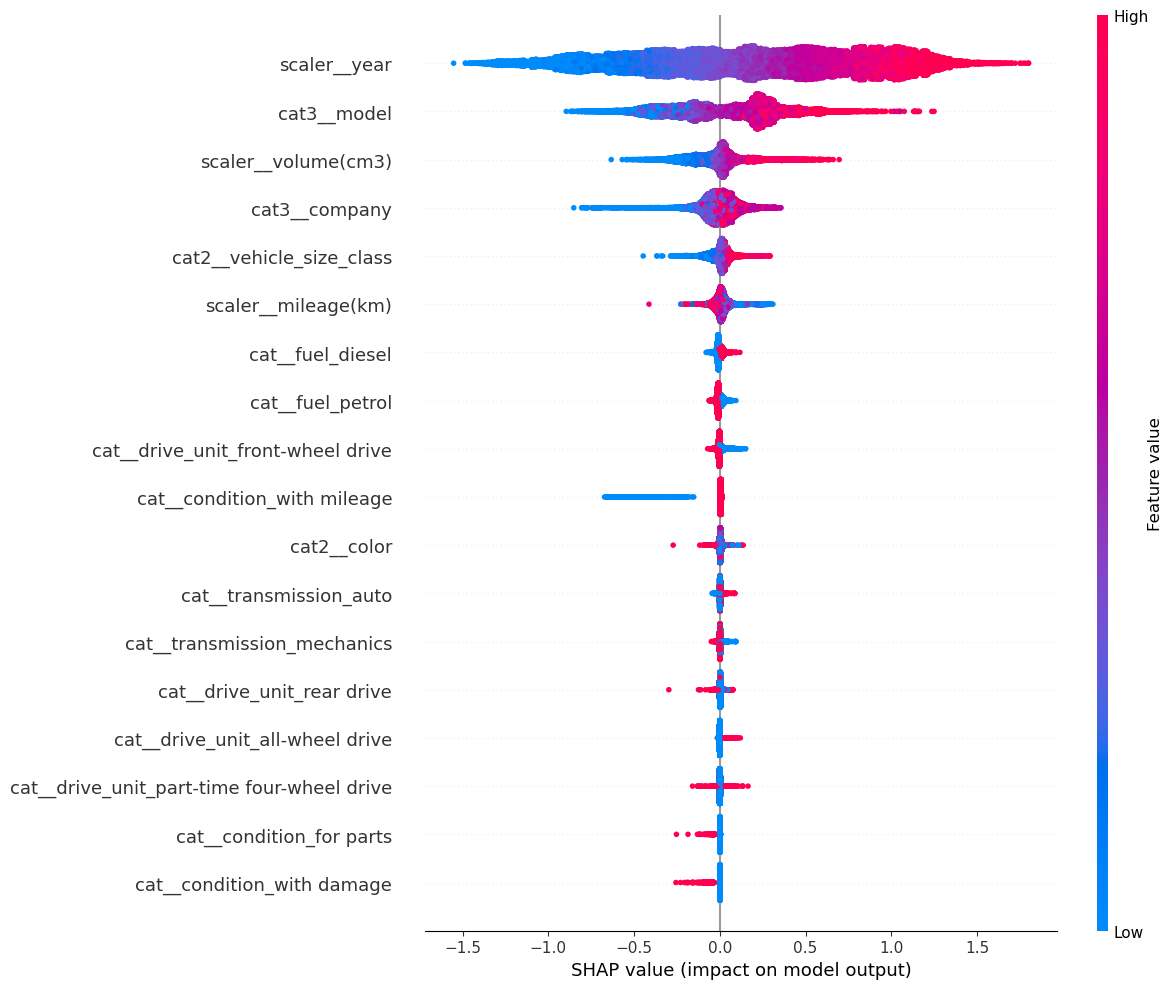

In [490]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
shap.summary_plot(shap_values = shap_values, 
                  features = X_train_transformed_df,
                  feature_names=feature_names, 
                  plot_size=None, show=False)

In [491]:
method_train = explainer(X_train_transformed_df)
explanation_train = shap.Explanation(values = method_train.values, 
                  base_values =  method_train.base_values, 
                  data = X_train.values, 
                  feature_names = feature_names)
def shapley_feature_ranking(explanation,func = np.mean):
    '''
    func по умолчанию np.mean, но можно заменить например на np.max
    '''
    feature_order = np.argsort(func(np.abs(explanation.values), axis=0))
    
    return pd.DataFrame(
        {
            "features": [explanation.feature_names[i] for i in feature_order][::-1],
            "importance": [
                func(np.abs(explanation.values), axis=0)[i] for i in feature_order
            ][::-1],
        }
    )

important_feature = shapley_feature_ranking(explanation_train)
display(important_feature.head(6))

100%|===================| 24314/24316 [30:03<00:00]        

,features,importance
0,scaler__year,0.590599
1,cat3__model,0.263272
2,scaler__volume(cm3),0.106403
3,cat3__company,0.070751
4,cat2__vehicle_size_class,0.038380
5,scaler__mileage(km),0.031788


In [494]:
important_feature['features'].values

array(['scaler__year', 'cat3__model', 'scaler__volume(cm3)',
       'cat3__company', 'cat2__vehicle_size_class', 'scaler__mileage(km)',
       'cat__fuel_diesel', 'cat__fuel_petrol',
       'cat__drive_unit_front-wheel drive', 'cat__condition_with mileage',
       'cat2__color', 'cat__transmission_auto',
       'cat__transmission_mechanics', 'cat__drive_unit_rear drive',
       'cat__drive_unit_all-wheel drive',
       'cat__drive_unit_part-time four-wheel drive',
       'cat__condition_for parts', 'cat__condition_with damage'],
      dtype=object)

In [497]:
rf=RandomForestRegressor(min_samples_leaf=1,min_samples_split=10,bootstrap=True)
rf.fit(X_train_transformed_df[['scaler__year', 'cat3__model', 'scaler__volume(cm3)','cat3__company', 'cat2__vehicle_size_class']],np.log(y_train))
y_pred=rf.predict(X_test_transformed_df[['scaler__year', 'cat3__model', 'scaler__volume(cm3)','cat3__company', 'cat2__vehicle_size_class']])
mape(y_test,np.exp(y_pred))

0.21150614222480885

In [ ]:
train_t=pd.read_csv(path_train)
X_train, X_test,y_train, y_test = train_test_split(train_cleaned.drop('priceUSD',axis=1), train_cleaned.priceUSD,train_size=0.7)